# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations and Criteria
- Be prepared to talk through your decisions & thinking (we encourage you to include these in code comments too!)
- You may use any language you like (the examples given below are using Python)
- Avoid libraries that would do too much of the work for you. For example, in Python a good approach would be to use `numpy`, but no packages with SOM specific functionality
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above
- Consider the best way to structure your code and code base for later use by other developers or in anticipation of productionisation (you don't need to use a Jupyter Notebook)
- Include any tests you may have used (tests are not required however)
- Include a `Dockerfile` to package your code for production
- Be prepared to discuss your approach and process to productionise this application
- You can use code below to generate the trainig data of 10 colours:

In [1]:
# Generate Data
import numpy as np
input_data = np.random.random((10,3))
input_data

array([[0.26664122, 0.24016723, 0.54568407],
       [0.39143091, 0.87068222, 0.53683689],
       [0.52352965, 0.46515117, 0.479933  ],
       [0.00818866, 0.24298381, 0.72839506],
       [0.57575617, 0.93951122, 0.85659043],
       [0.78836139, 0.99753457, 0.17864503],
       [0.94150265, 0.02480158, 0.63306426],
       [0.6243617 , 0.89907258, 0.79943501],
       [0.4451449 , 0.75379024, 0.9955321 ],
       [0.4501488 , 0.84780643, 0.75611073]])

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [3]:
# Implement the network...

In [2]:
### Functions
"""
# BMU calculator - v1
def BMU_calculator(V, node_weights, num_nodes, num_features):
    '''Returns index of node weights that corresponds to the node that is BMU and associated euclidean distance'''
    euc_dis = []
    # for each node i
    for i in range(0, num_nodes):        
        distances = []
        # for each feature k, calculate the distance 
        for k in range(0, num_features):
            distances.append((V[k] - node_weights[i][k])**2)
        euc_dis.append(np.sqrt(np.sum(distances)))
        
    return euc_dis.index(min(euc_dis)), min(euc_dis)
"""

# Improved BMU calculator
def BMU_calculator(V, node_weights):
    '''Returns index of node in node weights that is the BMU'''
    
    # calculate an array of euclidean distances between nodes and the input data 
    euc_distances = np.sqrt(np.sum((V - node_weights)**2,axis=1))
    
    # extract the index of the distances array with the minimum value
    bmu_idx = np.where(euc_distances == np.min(euc_distances))[0][0]
    
    return bmu_idx 

In [3]:
# Get neighborhood nodes
def get_nbr_nodes(node_coords, bmu_idx, n_rad):
    '''Return list of indexes of nodes that fall within neighborhood radius of BMU'''
    
    # convert node coordinates into a numpy array 
    node_coords = np.array(node_coords)
    
    # calculate an array of euclidean distances between nodes and the BMU
    euc_dis = np.sqrt(np.sum((node_coords - node_coords[bmu_idx])**2, axis=1))
    
    return list(np.where(euc_dis <= n_rad)[0])

In [4]:
"""
# update weight equation v1
def update_weights(t, node_idx, bmu_idx, V, node_weights, node_coords, time_constant, nbr_rad):
    ''' Returns the updated weights for a given node (node_idx) and iteration (t)'''
    
    # retrieve weights for current node
    curr_weights = node_weights[node_idx]
    
    # calculate learning rate for current iteration, t
    learning_rate = 0.1*np.exp(-t/time_constant)
    
    # calculate euclidean distance between current node and BMU in coordinate space
    euc_d = np.sqrt((node_coords[node_idx][0]-node_coords[bmu_idx][0])**2 + (node_coords[node_idx][1]-node_coords[bmu_idx][1])**2)
    
    # calculate influence
    influence = np.exp(-euc_d**2 / (2*nbr_rad**2))
    
    # return updated weight
    return curr_weights + learning_rate*influence*(V - curr_weights) 
"""

# update weights (all nbr nodes)
def update_weights_nbrs(t, bmu_idx, V, nbr_nodes, node_weights, node_coords, time_constant, nbr_rad):
    ''' Returns updated weights for all nodes based on proximity to BMU'''
    # calculate learning rate
    learning_rate = 0.1*np.exp(-t/time_constant)
    
    # index node_weights to get neighbors only
    nbr_node_weights = node_weights[nbr_nodes]

    # convert node_coords into array and index
    nbr_node_coords = np.array(node_coords)[nbr_nodes]
    bmu_coords = np.array(node_coords[bmu_idx])

    # find distance in coordindate space between each node and BMU -  sqrt( (X2 - X1)^2 + (Y2 - Y1)^2 )
    euc_dis = np.sqrt(np.sum((bmu_coords - nbr_node_coords)**2,axis=1))
    
    # calculates the influences for the neighborhood nodes
    influences = np.exp(-euc_dis**2 / (2*nbr_rad**2)) 
    
    # adjust the current weights using the weight update equation
    node_weights[nbr_nodes] = nbr_node_weights + learning_rate*(influences*(V - nbr_node_weights).T).T 

    return node_weights

In [5]:
# main run through

# define network structure
sizeX, sizeY = 10, 10
num_nodes = sizeX*sizeY
node_list = list(range(0,num_nodes))
node_coords = [[x,y] for y in range(0,sizeY) for x in range(0,sizeX)]

# define variables and constants
nmax_iter = 100                                # desired number of training iterations 
N = input_data.shape[0]                        # number of training samples, N
num_features = input_data.shape[1]             # number of features in input X
init_rad = max(sizeX,sizeY) / 2                # initial neighbourhood radius
time_constant = nmax_iter / np.log(init_rad)   # time constant 

### step 1: randomly initialize weights
# for each node, randomly initialize a vector of weights of length number of features
node_weights = np.random.random((num_nodes,num_features))

### step 2: iterate through training data 
# loop through t from 0 to max iterations
for t in range(1, nmax_iter+1):

    # using one record of training data at a time, V
    for idx, V in enumerate(input_data):

        ### step 3: determine the bets matching unit
        # determine the index of node_list/node_coords that corresponds to BMU
        bmu_idx = BMU_calculator(V, node_weights)

        ### step 4: calculate which nodes are in the BMU's neighbourhood
        # step 4a: calculate the radius of the neighbourhood of the BMU
        nbr_rad = init_rad*np.exp(-t / time_constant)

        # step 4b: work out which nodes are within the radius
        nbr_nodes = get_nbr_nodes(node_coords, bmu_idx, nbr_rad)

        #### step 5: adjust the weights of the nodes within the radius
        node_weights = update_weights_nbrs(t, bmu_idx, V, nbr_nodes, node_weights, node_coords, time_constant, nbr_rad)

In [6]:
# translate node weights into pixel data
node_pixels = np.reshape(node_weights, (sizeX,sizeY,3))

In [7]:
class Kohonen():
    
    def __init__(self, sizeX, sizeY):
        self.sizeX, self.sizeY = sizeX, sizeY
        self.num_nodes = sizeX*sizeY
        self.node_coords = np.array([[x,y] for y in range(0, self.sizeY) for x in range(0,self.sizeX)])
        
    def train(self, input_data, nmax_iter):
        ''' Train the SOM with the input training data'''
        node_weights = np.random.random((self.num_nodes, input_data.shape[1]))

        init_rad = max(self.sizeX, self.sizeY) / 2
        time_constant = nmax_iter / np.log(init_rad)
        
        for t in range(1, nmax_iter+1):
            for idx, V in enumerate(input_data):
                bmu_idx = self.BMU_calculator(V, node_weights)
                nbr_rad = init_rad*np.exp(-t / time_constant)
                nbr_nodes = self.get_nbr_nodes(bmu_idx, nbr_rad)
                node_weights = self.update_weights_nbrs(t, bmu_idx, V, nbr_nodes, node_weights, time_constant, nbr_rad)

        return node_weights
        
    
    def BMU_calculator(self, V, node_weights):
        '''Returns index of node in node weights that is the BMU'''
        euc_distances = np.sqrt(np.sum((V - node_weights)**2,axis=1))
        return np.where(euc_distances == np.min(euc_distances))[0][0]
        
    def get_nbr_nodes(self, bmu_idx, nbr_rad):
        '''Return list of indexes of nodes that fall within neighborhood radius of BMU'''
        euc_dis = np.sqrt(np.sum((self.node_coords - self.node_coords[bmu_idx])**2, axis=1))
        return list(np.where(euc_dis <= nbr_rad)[0])
    
    def update_weights_nbrs(self, t, bmu_idx, V, nbr_nodes, node_weights, time_constant, nbr_rad):
        ''' Returns updated weights for all nodes based on proximity to BMU'''
        learning_rate = 0.1*np.exp(-t/time_constant)
        nbr_node_weights = node_weights[nbr_nodes]
        nbr_node_coords, bmu_coords  = self.node_coords[nbr_nodes], self.node_coords[bmu_idx]

        euc_dis = np.sqrt(np.sum((bmu_coords - nbr_node_coords)**2,axis=1))
        influences = np.exp(-euc_dis**2 / (2*nbr_rad**2)) 
        node_weights[nbr_nodes] = nbr_node_weights + learning_rate*(influences*(V - nbr_node_weights).T).T 
        return node_weights
    
    def __str__(self):
        return f'Kohonen network of shape ({self.sizeX},{self.sizeY})'

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

You should end up with something that looks like below after 500 iterations:

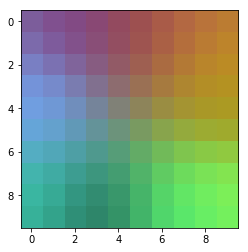

In [147]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

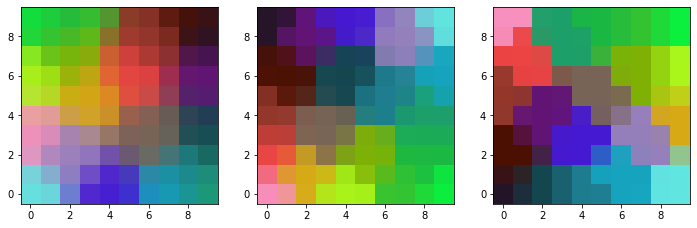

In [10]:
import matplotlib.pyplot as plt

input_data = np.random.random((20,3))
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))

for idx, niter in enumerate([100,200,500]):
    som = Kohonen(10,10)
    node_weights = som.train(input_data, nmax_iter=niter)
    node_pixels = np.reshape(node_weights, (10,10,3))
    axes[idx].imshow(node_pixels, origin='lower')

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

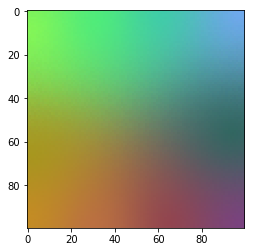

In [141]:
import matplotlib.pyplot as plt
plt.imshow(image_data)

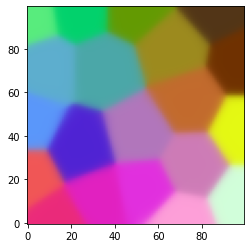

In [11]:
# train a 100x100 network with 1000 iterations
input_data = np.random.random((20,3))
som = Kohonen(100, 100)
node_weights = som.train(input_data, nmax_iter=1000)
node_pixels = np.reshape(node_weights, (100,100,3))
plt.imshow(node_pixels, origin='lower')